<a href="https://colab.research.google.com/github/danknooob/API-Rate-Limiter/blob/main/TrellisDiagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

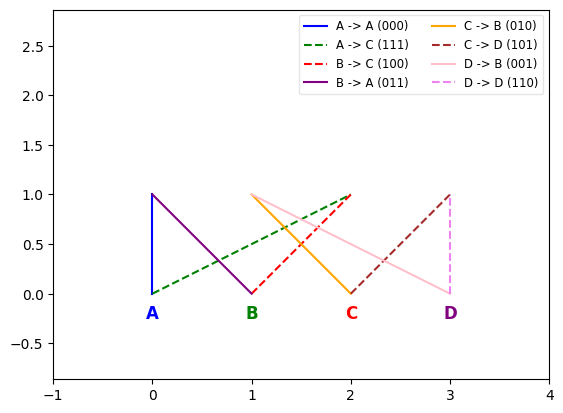

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

states = ["A", "B", "C", "D"]
transitions = {
    "A": [("000", "A"), ("111", "C")],
    "B": [("100", "C"), ("011", "A")],
    "C": [("010", "B"), ("101", "D")],
    "D": [("001", "B"), ("110", "D")],
}
positions = {"A": (0, 0), "B": (1, 0), "C": (2, 0), "D": (3, 0)}


transition_colors = {
    "000": "blue",
    "111": "green",
    "100": "red",
    "011": "purple",
    "010": "orange",
    "101": "brown",
    "001": "pink",
    "110": "violet"
}


fig, ax = plt.subplots()


for state, next_states in transitions.items():
    x, y = positions[state]
    for transition_code, next_state_name in next_states:
        nx, ny = positions[next_state_name]


        linestyle = '-' if transition_code[0] == '0' else '--'


        color = transition_colors.get(transition_code, "black")

        if state == next_state_name:

            end_y = y + 1
            plt.plot([x, x], [y, end_y], color=color, linestyle=linestyle, label=f"{state} -> {next_state_name} ({transition_code})")
        else:

            end_y = y + 1
            plt.plot([x, nx], [y, end_y], color=color, linestyle=linestyle, label=f"{state} -> {next_state_name} ({transition_code})")


label_colors = {"A": "blue", "B": "green", "C": "red", "D": "purple"}
for state, (x, y) in positions.items():
    plt.text(x, y - 0.2, state, ha="center", va="center", fontsize=12, fontweight='bold', color=label_colors[state])


ax.set_xlim(-1, 4)
ax.set_ylim(-1, 3)
ax.set_aspect("equal", adjustable="datalim")


plt.legend(loc="upper right", fontsize="small", framealpha=0.5, ncol=2)
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

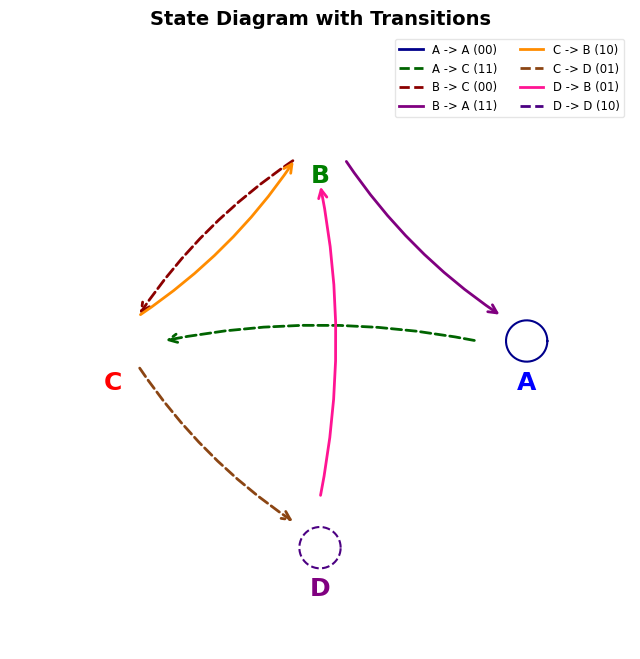

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define states and transitions
states = ["A", "B", "C", "D"]
transitions = {
    "A": [("000", "A"), ("111", "C")],
    "B": [("100", "C"), ("011", "A")],
    "C": [("010", "B"), ("101", "D")],
    "D": [("001", "B"), ("110", "D")]
}

# Transition colors (darker tones for better visibility)
transition_colors = {
    "000": "#00008B",  # Dark Blue
    "111": "#006400",  # Dark Green
    "100": "#8B0000",  # Dark Red
    "011": "#800080",  # Dark Purple
    "010": "#FF8C00",  # Dark Orange
    "101": "#8B4513",  # Saddle Brown
    "001": "#FF1493",  # Deep Pink
    "110": "#4B0082"   # Indigo
}

# Arrange the states in a circular layout
num_states = len(states)
angle_step = 2 * np.pi / num_states
positions = {state: (np.cos(i * angle_step), np.sin(i * angle_step)) for i, state in enumerate(states)}

# Plot setup
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_aspect("equal", adjustable="datalim")

# Plot each transition with improved layout
for state, next_states in transitions.items():
    x, y = positions[state]
    for transition_code, next_state_name in next_states:
        nx, ny = positions[next_state_name]
        dx, dy = nx - x, ny - y
        arrow_offset = 0.12  # Slight offset to separate arrows from state labels

        # Style and color based on transition code
        linestyle = '-' if transition_code[0] == '0' else '--'
        color = transition_colors.get(transition_code, "black")

        # Check if it's a self-loop
        if state == next_state_name:
            # Self-loop (circular arrow without an arrowhead)
            loop_radius = 0.1
            loop_angle = np.linspace(0, 2 * np.pi, 50)
            loop_x = x + loop_radius * np.cos(loop_angle)
            loop_y = y + loop_radius * np.sin(loop_angle)
            ax.plot(loop_x, loop_y, color=color, linestyle=linestyle, lw=1.5)
        else:
            # Curved arrow for transitions between different states to avoid overlap
            curvature = 0.1  # Amount of curvature for the arrows
            ax.annotate(
                "", xy=(nx - dx * arrow_offset, ny - dy * arrow_offset), xytext=(x + dx * arrow_offset, y + dy * arrow_offset),
                arrowprops=dict(
                    arrowstyle="->", color=color, linestyle=linestyle, lw=2,
                    connectionstyle=f"arc3,rad={curvature}", mutation_scale=15  # Adjust the arrowhead size
                )
            )

        # Plot the label for the transition in the legend (only the last two bits)
        last_two_bits = transition_code[-2:]  # Only the last two bits for the legend
        ax.plot([], [], color=color, linestyle=linestyle, lw=2, label=f"{state} -> {next_state_name} ({last_two_bits})")

# Plot the state labels with a larger font size
label_colors = {"A": "blue", "B": "green", "C": "red", "D": "purple"}
for state, (x, y) in positions.items():
    ax.text(x, y - 0.2, state, ha="center", va="center", fontsize=18, fontweight='bold', color=label_colors[state])  # Increased fontsize

# Set axis limits and remove ticks
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)
ax.axis("off")

# Adjust legend with two columns
plt.legend(loc="upper right", fontsize="small", framealpha=0.5, ncol=2)

# Set the title and show the plot
plt.title("State Diagram with Transitions", fontsize=14, fontweight='bold')
plt.show()


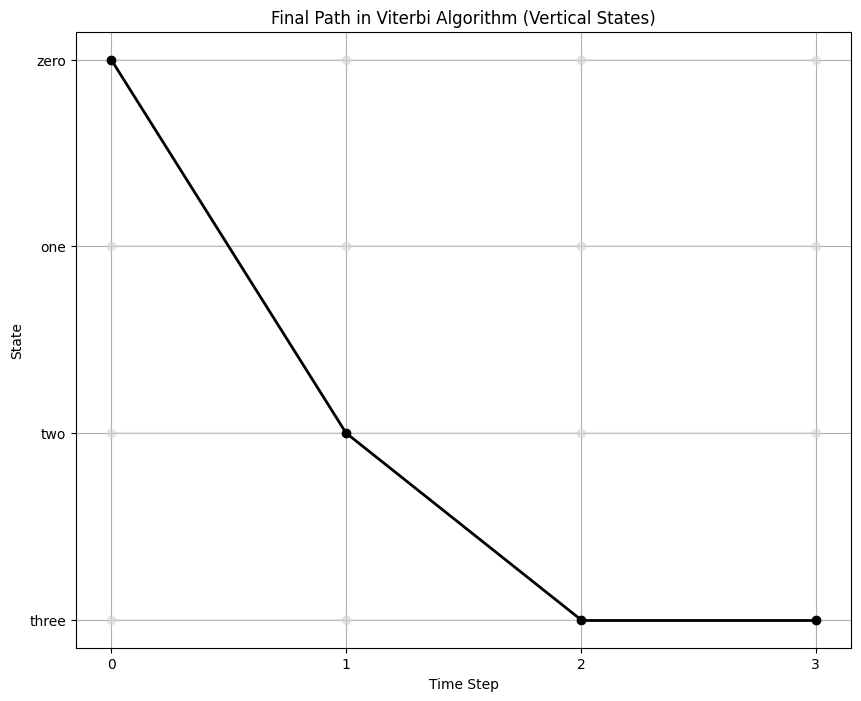

Decoded path (reversed): [1, 1, 1]
Source state: zero
Finish


In [ ]:
import matplotlib.pyplot as plt

# Define the function to compute bit differences
def bits_diff_num(num_1, num_2):
    return sum(1 for i in range(len(num_1)) if num_1[i] != num_2[i])

# Viterbi path function
def viterbi_path(obs, start_metric, state_machine):
    V = [{}]
    for st in state_machine:
        V[0][st] = {"metric": start_metric[st]}

    for t in range(1, len(obs) + 1):
        V.append({})
        for st in state_machine:
            prev_st_b1 = state_machine[st]['b1']['prev_st']
            metric_b1 = V[t - 1][prev_st_b1]["metric"] + bits_diff_num(state_machine[st]['b1']['out_b'], obs[t - 1])

            prev_st_b2 = state_machine[st]['b2']['prev_st']
            metric_b2 = V[t - 1][prev_st_b2]["metric"] + bits_diff_num(state_machine[st]['b2']['out_b'], obs[t - 1])

            if metric_b1 > metric_b2:
                V[t][st] = {"metric": metric_b2, "branch": 'b2'}
            else:
                V[t][st] = {"metric": metric_b1, "branch": 'b1'}

    # Traceback the optimal path
    path = []
    t = len(obs)
    min_metric_state = min(V[t], key=lambda x: V[t][x]["metric"])
    path.append((t, min_metric_state))  # Store timestep and state

    for t in range(len(obs), 0, -1):
        branch = V[t][path[-1][1]]["branch"]
        next_state = state_machine[path[-1][1]][branch]['prev_st']
        path.append((t - 1, next_state))

    return path[::-1], V, {st: [V[t][st]["metric"] for t in range(len(V))] for st in state_machine}

# Observations and setup
obs = ("11","01","10")
start_metric = {'zero': 0, 'one': 0, 'two': 0, 'three': 0}
state_machine = {
    'zero': {'b1': {'out_b': "11", 'prev_st': 'one', 'input_b': 0},
             'b2': {'out_b': "00", 'prev_st': 'zero', 'input_b': 0}},
    'one': {'b1': {'out_b': "01", 'prev_st': 'three', 'input_b': 0},
            'b2': {'out_b': "10", 'prev_st': 'two', 'input_b': 0}},
    'two': {'b1': {'out_b': "11", 'prev_st': 'zero', 'input_b': 1},
            'b2': {'out_b': "00", 'prev_st': 'one', 'input_b': 1}},
    'three': {'b1': {'out_b': "10", 'prev_st': 'three', 'input_b': 1},
              'b2': {'out_b': "01", 'prev_st': 'two', 'input_b': 1}},
}

# Get the optimal path and the metrics
path, V, metrics = viterbi_path(obs, start_metric, state_machine)

# Plotting the final path
states = list(state_machine.keys())
time_steps = range(len(obs) + 1)
plt.figure(figsize=(10, 8))

# Plot all states lightly
for state in states:
    y_values = [states.index(state)] * len(time_steps)
    plt.plot(time_steps, y_values, marker='o', color='lightgray', alpha=0.5)

# Highlight the final path in black
for i in range(len(path) - 1):
    t1, s1 = path[i]
    t2, s2 = path[i + 1]
    plt.plot([t1, t2], [states.index(s1), states.index(s2)], 'k-', linewidth=2)
    plt.scatter(t1, states.index(s1), color='black', zorder=5)

# Add markers for the last step
plt.scatter(path[-1][0], states.index(path[-1][1]), color='black', zorder=5)

plt.title("Final Path in Viterbi Algorithm (Vertical States)")
plt.xlabel("Time Step")
plt.ylabel("State")
plt.yticks(range(len(states)), states)
plt.xticks(time_steps)
plt.gca().invert_yaxis()  # Invert y-axis for top-down view
plt.grid(True)
plt.show()

# Decoding the final path
traceback_path = []
source_state = path[-1][1]
for t in range(len(obs), 0, -1):
    branch = state_machine[source_state][V[t][source_state]["branch"]]
    traceback_path.append(branch['input_b'])
    source_state = branch['prev_st']

# Print the final decoded path
print("Decoded path (reversed):", traceback_path[::-1])
print("Source state:", source_state)
print("Finish")
